<a href="https://colab.research.google.com/github/nidhi-059/Region-captioning-on-images-using-dl/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.data import loadlocal_mnist
train_x, train_y = loadlocal_mnist(images_path='/content/train-images.idx3-ubyte', labels_path='/content/train-labels.idx1-ubyte')
test_x, test_y = loadlocal_mnist(images_path='/content/t10k-images.idx3-ubyte', labels_path='/content/t10k-labels.idx1-ubyte')

In [ ]:
# Load MNIST data
train_x, train_y = loadlocal_mnist(
    images_path='/content/train-images.idx3-ubyte',
    labels_path='/content/train-labels.idx1-ubyte'
)
test_x, test_y = loadlocal_mnist(
    images_path='/content/t10k-images.idx3-ubyte',
    labels_path='/content/t10k-labels.idx1-ubyte'
)

# Print original shapes
print("Before preprocessing:")
print("Train X:", train_x.shape)
print("Train Y:", train_y.shape)

# Transpose input data to shape: (features, samples)
train_x = train_x.T  # (784, 60000)
test_x = test_x.T    # (784, 10000)

# Normalize pixel values to [0, 1]
train_x = train_x / 255.0
test_x = test_x / 255.0

# Reshape labels to shape: (1, samples)
train_y = train_y.reshape(1, -1)  # (1, 60000)
test_y = test_y.reshape(1, -1)    # (1, 10000)

# Print shapes after preprocessing
print("\nAfter preprocessing:")
print("Train X:", train_x.shape)
print("Train Y:", train_y.shape)
print("Test X:", test_x.shape)
print("Test Y:", test_y.shape)

Before preprocessing:
Train X: (60000, 784)
Train Y: (60000,)

After preprocessing:
Train X: (784, 60000)
Train Y: (1, 60000)
Test X: (784, 10000)
Test Y: (1, 10000)


In [ ]:
def softmax(z):
    z = z - np.max(z, aeepxis=0, kdims=True)  # prevent overflow
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)


In [ ]:
def initial_param(z):
    w1=np.random.rand(10,z.shape[0])*0.01
    b1=np.zeros((10,1))*0.01
    return w1,b1

In [ ]:
def forward_prop(w1,b1,x):
    z1=np.dot(w1,x)+b1
    a1=softmax(z1)
    return z1,a1
#not understood
def one_hot_encode(y):
    one_hot=np.zeros((y.size,y.max()+1))
    one_hot[np.arange(y.size),y]=1
    one_hot=one_hot.T
    return one_hot

In [ ]:
def backward_prop(z1,w1,b1,a1,x,y):
    one_hot_y=one_hot_encode(y)
    dz1=a1-one_hot_y
    dw1=(1/train_x.shape[1])*np.dot(dz1,x.T)
    db1 = (1/train_x.shape[1]) * np.sum(dz1, axis=1, keepdims=True)
    return dw1,db1

def update_param(w1,b1,dw1,db1,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    return w1,b1

In [ ]:
def get_predic(a1):
    return np.argmax(a1,0)

def get_accuracy(predic,y):
    #print(predic,y)
    return np.sum(predic==y)/y.size
def compute_loss(a1, y):
    m = y.shape[1]
    one_hot_y = one_hot_encode(y)
    log_probs = np.log(a1 + 1e-8)
    loss = -np.sum(one_hot_y * log_probs) / m
    return loss

def grad_descent(x,y,alpha,iter):
    w1,b1=initial_param(x)
    losses=[]
    accuracies=[]
    for i in range(iter):
        z1,a1=forward_prop(w1,b1,x)
        loss = compute_loss(a1, y)
        losses.append(loss)
        pred = get_predic(a1)
        acc = get_accuracy(pred, y)
        accuracies.append(acc)
        dw1,db1=backward_prop(z1,w1,b1,a1,x,y)
        w1,b1=update_param(w1,b1,dw1,db1,alpha)
        if i%10==0:
            print("Epochs:",i)
            predic=get_predic(a1)
            print("Accuracy: ",get_accuracy(predic,y)*100)
            print("Loss: ",loss)

    plt.plot(losses)
    plt.title("Training Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(False)
    plt.show()
    plt.plot(accuracies)
    plt.title("Training Accuracy Over Epochs")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.grid(False)
    plt.show()

    return w1,b1


Epochs: 0
Accuracy:  7.563333333333333
Loss:  2.3038962140508983
Epochs: 10
Accuracy:  67.92666666666666
Loss:  1.3134736532270432
Epochs: 20
Accuracy:  79.68333333333332
Loss:  0.6346443782798106
Epochs: 30
Accuracy:  87.68166666666667
Loss:  0.428104511581318
Epochs: 40
Accuracy:  88.43833333333333
Loss:  0.3981332563090343
Epochs: 50
Accuracy:  88.51
Loss:  0.3905861922777349
Epochs: 60
Accuracy:  89.05333333333333
Loss:  0.3744767380276802
Epochs: 70
Accuracy:  89.75666666666666
Loss:  0.35707870522058355
Epochs: 80
Accuracy:  90.18666666666667
Loss:  0.3465058314990945
Epochs: 90
Accuracy:  90.41333333333334
Loss:  0.33961026583057535
Epochs: 100
Accuracy:  90.62166666666667
Loss:  0.3343640659335762
Epochs: 110
Accuracy:  90.78166666666667
Loss:  0.3300100292493556
Epochs: 120
Accuracy:  90.88333333333334
Loss:  0.32623013285667696
Epochs: 130
Accuracy:  90.99666666666667
Loss:  0.3228718721609147
Epochs: 140
Accuracy:  91.07666666666667
Loss:  0.3198510302622783
Epochs: 150
Accu

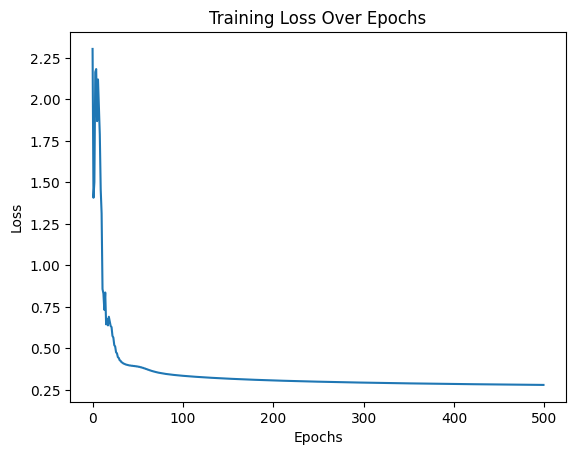

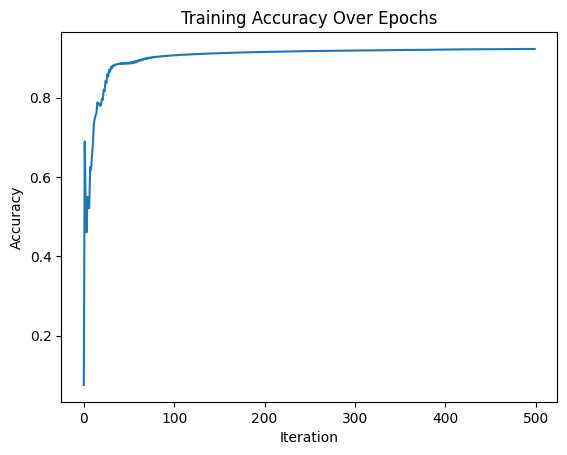

In [ ]:
w1,b1=grad_descent(train_x,train_y,1.2,500)

prediction: [5]
label: 5


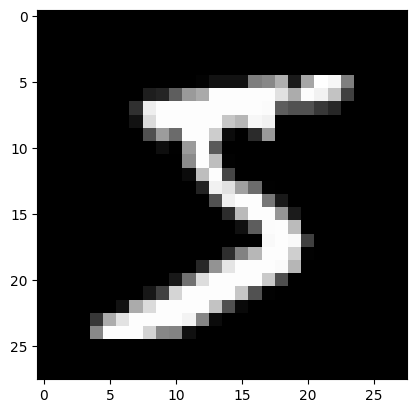

prediction: [0]
label: 0


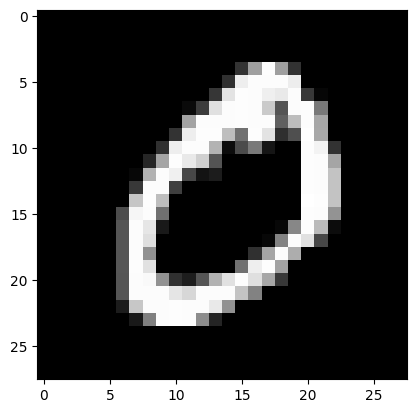

prediction: [4]
label: 4


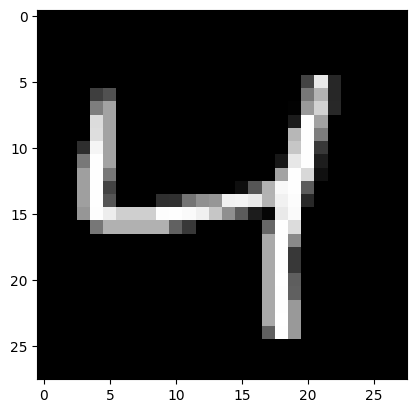

prediction: [1]
label: 1


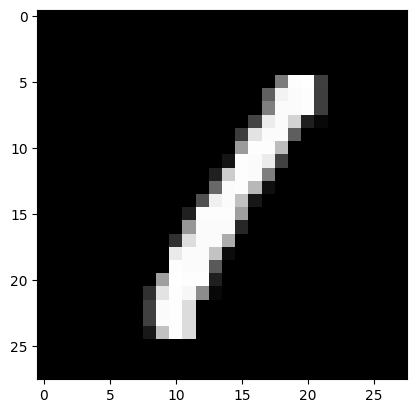

prediction: [9]
label: 9


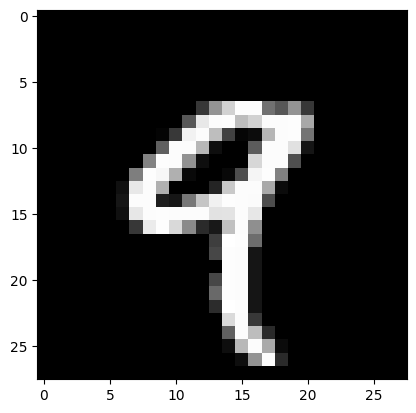

In [ ]:
def make_prediction(x,w1,b1):
    _,a1=forward_prop(w1,b1,x)
    y_pred=get_predic(a1)
    return y_pred

def test_prediction(index,w1,b1):
    current_img=train_x[:,index,None]
    prediction=make_prediction(current_img,w1,b1)
    label=train_y[0,index]
    print("prediction:",prediction)
    print("label:",label)

    current_img=current_img.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_img,interpolation='nearest')
    plt.show()

test_prediction(80,w1,b1)
test_prediction(95,w1,b1)
test_prediction(26,w1,b1)
test_prediction(39,w1,b1)
test_prediction(48,w1,b1)

In [ ]:
def compute_accuracy(X, Y, W, b):
    """
    X: input data of shape (784, m)
    Y: true labels of shape (1, m)
    W: weights of shape (10, 784)
    b: bias of shape (10, 1)
    """
    Z = np.dot(W, X) + b           # Linear forward
    A = softmax(Z)                 # Softmax activation
    predictions = np.argmax(A, axis=0)  # Predicted class labels
    labels = Y.flatten()               # Convert (1, m) to (m,)
    accuracy = np.mean(predictions == labels) * 100
    return accuracy

acc_train = compute_accuracy(train_x, train_y, w1, b1)
acc_test = compute_accuracy(test_x, test_y, w1, b1)

print(f"Train Accuracy: {acc_train:.2f}%")
print(f"Test Accuracy: {acc_test:.2f}%")


Train Accuracy: 92.25%
Test Accuracy: 92.20%
